# Iris Dataset

In [65]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd 

import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()


In [4]:
x_iris = iris.data
y_iris = iris.target

In [5]:
x = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns=['target'])
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width')

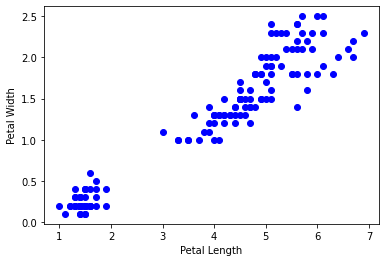

In [9]:
plt.scatter(x['petal_length'], x['petal_width'], c='blue')
plt.xlabel('Petal Length', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)

In [32]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(x)
y_labels = model.labels_

In [33]:
y_hat = model.predict(x)
print(f'Predicciones {y_hat}')

Predicciones [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [34]:
accuracy = metrics.adjusted_rand_score(y_iris, y_hat)
print(accuracy)

0.7302382722834697


Text(0, 0.5, 'Petal Width')

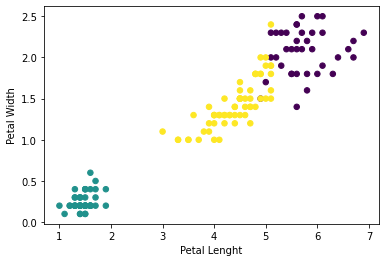

In [35]:
plt.scatter(x['petal_length'], x['petal_width'], c=y_hat, s=30)
plt.xlabel('Petal Lenght', fontsize=10)
plt.ylabel('Petal Width', fontsize=10)

# Wine Dataset

In [37]:
wine_dataset = datasets.load_wine()

In [49]:
x_wine = wine_dataset.data
x = pd.DataFrame(x_wine, columns=wine_dataset.feature_names)
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [48]:
y_wine = wine_dataset.target
y = pd.DataFrame(y_wine, columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 0, 'Proline')

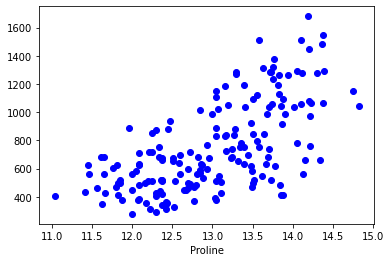

In [52]:
plt.scatter(x['alcohol'], x['proline'], c='blue')
plt.xlabel('Alcohol', fontsize=10)
plt.xlabel('Proline', fontsize=10)

In [66]:
def plot_model(model, y_hat):
    plt.scatter(x['alcohol'], x['proline'], c=y_hat, s=30)
    plt.xlabel('Alcohol', fontsize=10)
    plt.ylabel('Proline', fontsize=10)
    plt.show()
    

def get_x_y(dataset):
    scaler = StandardScaler()
    
    x_wine = dataset.data
    scaler.fit(x_wine)
    x_scaled = scaler.transform(dataset.data)
    x = pd.DataFrame(x_scaled, columns=dataset.feature_names)
    
    y_wine = dataset.target
    y = pd.DataFrame(y_wine, columns=['target'])
    
    return x, y_wine

    
def find_model(dataset):
    
    x, y_values = get_x_y(dataset)
    accuracy = 0
    model = []
    clusters = 0
    
    for n_clusters in range(1,10):
        test_model = KMeans(n_clusters=n_clusters, max_iter=1000)
        test_model.fit(x)
        y_hat = test_model.predict(x)
        test_accuracy = metrics.adjusted_rand_score(y_values, y_hat)
        if test_accuracy > accuracy:
            accuracy = test_accuracy
            model = test_model
            clusters = n_clusters
    
    print(f'The number of clusters is {clusters} with an accuracy of {round(accuracy*100, 2)}')
    
    plot_model(model, model.predict(x))
    

The number of clusters is 3 with an accuracy of 89.75


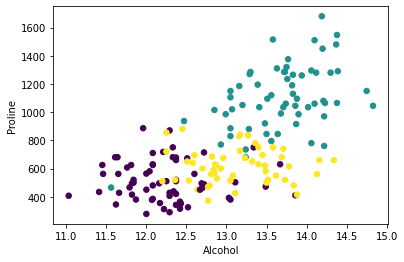

In [67]:
if __name__ == '__main__':
    wine_dataset = datasets.load_wine()
    find_model(wine_dataset)